In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import quandl as ql
import dataframe_image as dfi
sns.set(style='whitegrid', font_scale=5, rc={'figure.figsize':(53,30)})

In [18]:
def patentdata(csv_path, csv_path2=None, slicereverse=False):
    data=pd.read_csv(csv_path, header=1)
    if csv_path2!=None:
        data2=pd.read_csv(csv_path2, header=1)
        data=pd.concat([data, data2]).drop_duplicates().reset_index(drop=True)
    data=data.drop(columns=['id', 'result link', 'representative figure link', 'priority date', 'publication date', 'inventor/author'])
    data=data.set_index('filing/creation date')
    data.index=pd.to_datetime(data.index)
    data=data.sort_index(ascending=False)
    if slicereverse==True:
        data=data['19700101':'20191231']
    if slicereverse==False:
        data=data['20191231':]
    return data

In [4]:
def Count_Y(data, name):
    Count_Y=data.index.year.value_counts().sort_index(ascending=False)
    Count_Y=pd.DataFrame(Count_Y)
    Count_Y=Count_Y.rename(columns={'filing/creation date': name})
    return Count_Y

In [5]:
applepat=patentdata(r'C:\Users\A\Jupyter\Patents & IP Project\Apple Computer, Inc. - Patents.csv', r'C:\Users\A\Jupyter\Patents & IP Project\Apple Inc. - Patents.csv')
huaweipat=patentdata(r'C:\Users\A\Jupyter\Patents & IP Project\Huawei - Patents.csv')
samsungpat=patentdata(r'C:\Users\A\Jupyter\Patents & IP Project\Samsung - Patents.csv')
dellpat=patentdata(r'C:\Users\A\Jupyter\Patents & IP Project\Dell - Patents.csv', slicereverse=True)

In [6]:
applepat_count=Count_Y(applepat, 'Apple')
huawei_count=Count_Y(huaweipat, 'Huawei')
samsung_count=Count_Y(samsungpat, 'Samsung')
dell_count=Count_Y(dellpat, 'Dell')
countdf=pd.concat([applepat_count, huawei_count, samsung_count, dell_count], axis=1)
countdf.index=countdf.index.astype('int64')
countdf.index=pd.to_datetime(countdf.index, format='%Y')
countdf=countdf['1999':]
countdf=countdf.reset_index()
countdf['index']=countdf['index'].apply(lambda x: x.strftime('%Y'))
countdf.set_index('index', inplace=True)
countdf.index=countdf.index.rename('Date')
countdf

,Apple,Huawei,Samsung,Dell
Date,,,,
1999,239.0,5.0,305.0,271
2000,245.0,12.0,265.0,204
2001,311.0,81.0,847.0,259
2002,351.0,173.0,999.0,211
2003,383.0,256.0,1322.0,277
2004,426.0,207.0,1482.0,279
2005,584.0,328.0,1514.0,393
2006,694.0,767.0,1622.0,414
2007,830.0,856.0,1569.0,404


In [8]:
countdf['Apple'].sum()

22742.0

In [7]:
patstat=[countdf.sum(),countdf.mean(), countdf.max(), countdf.min()]
patstat=pd.DataFrame(patstat, index=(['Total', 'Average', 'Most in a Year', 'Least in a Year'])).T
patstat.columns.name='Patent Statistics'
patstat=patstat.style.highlight_min(color='coral').highlight_max(color='lightskyblue', subset=['Total', 'Average', 'Most in a Year'])
patstat.export_png(r'C:\Users\A\Jupyter\Patents & IP Project\Patent Statistics.png', fontsize=18)

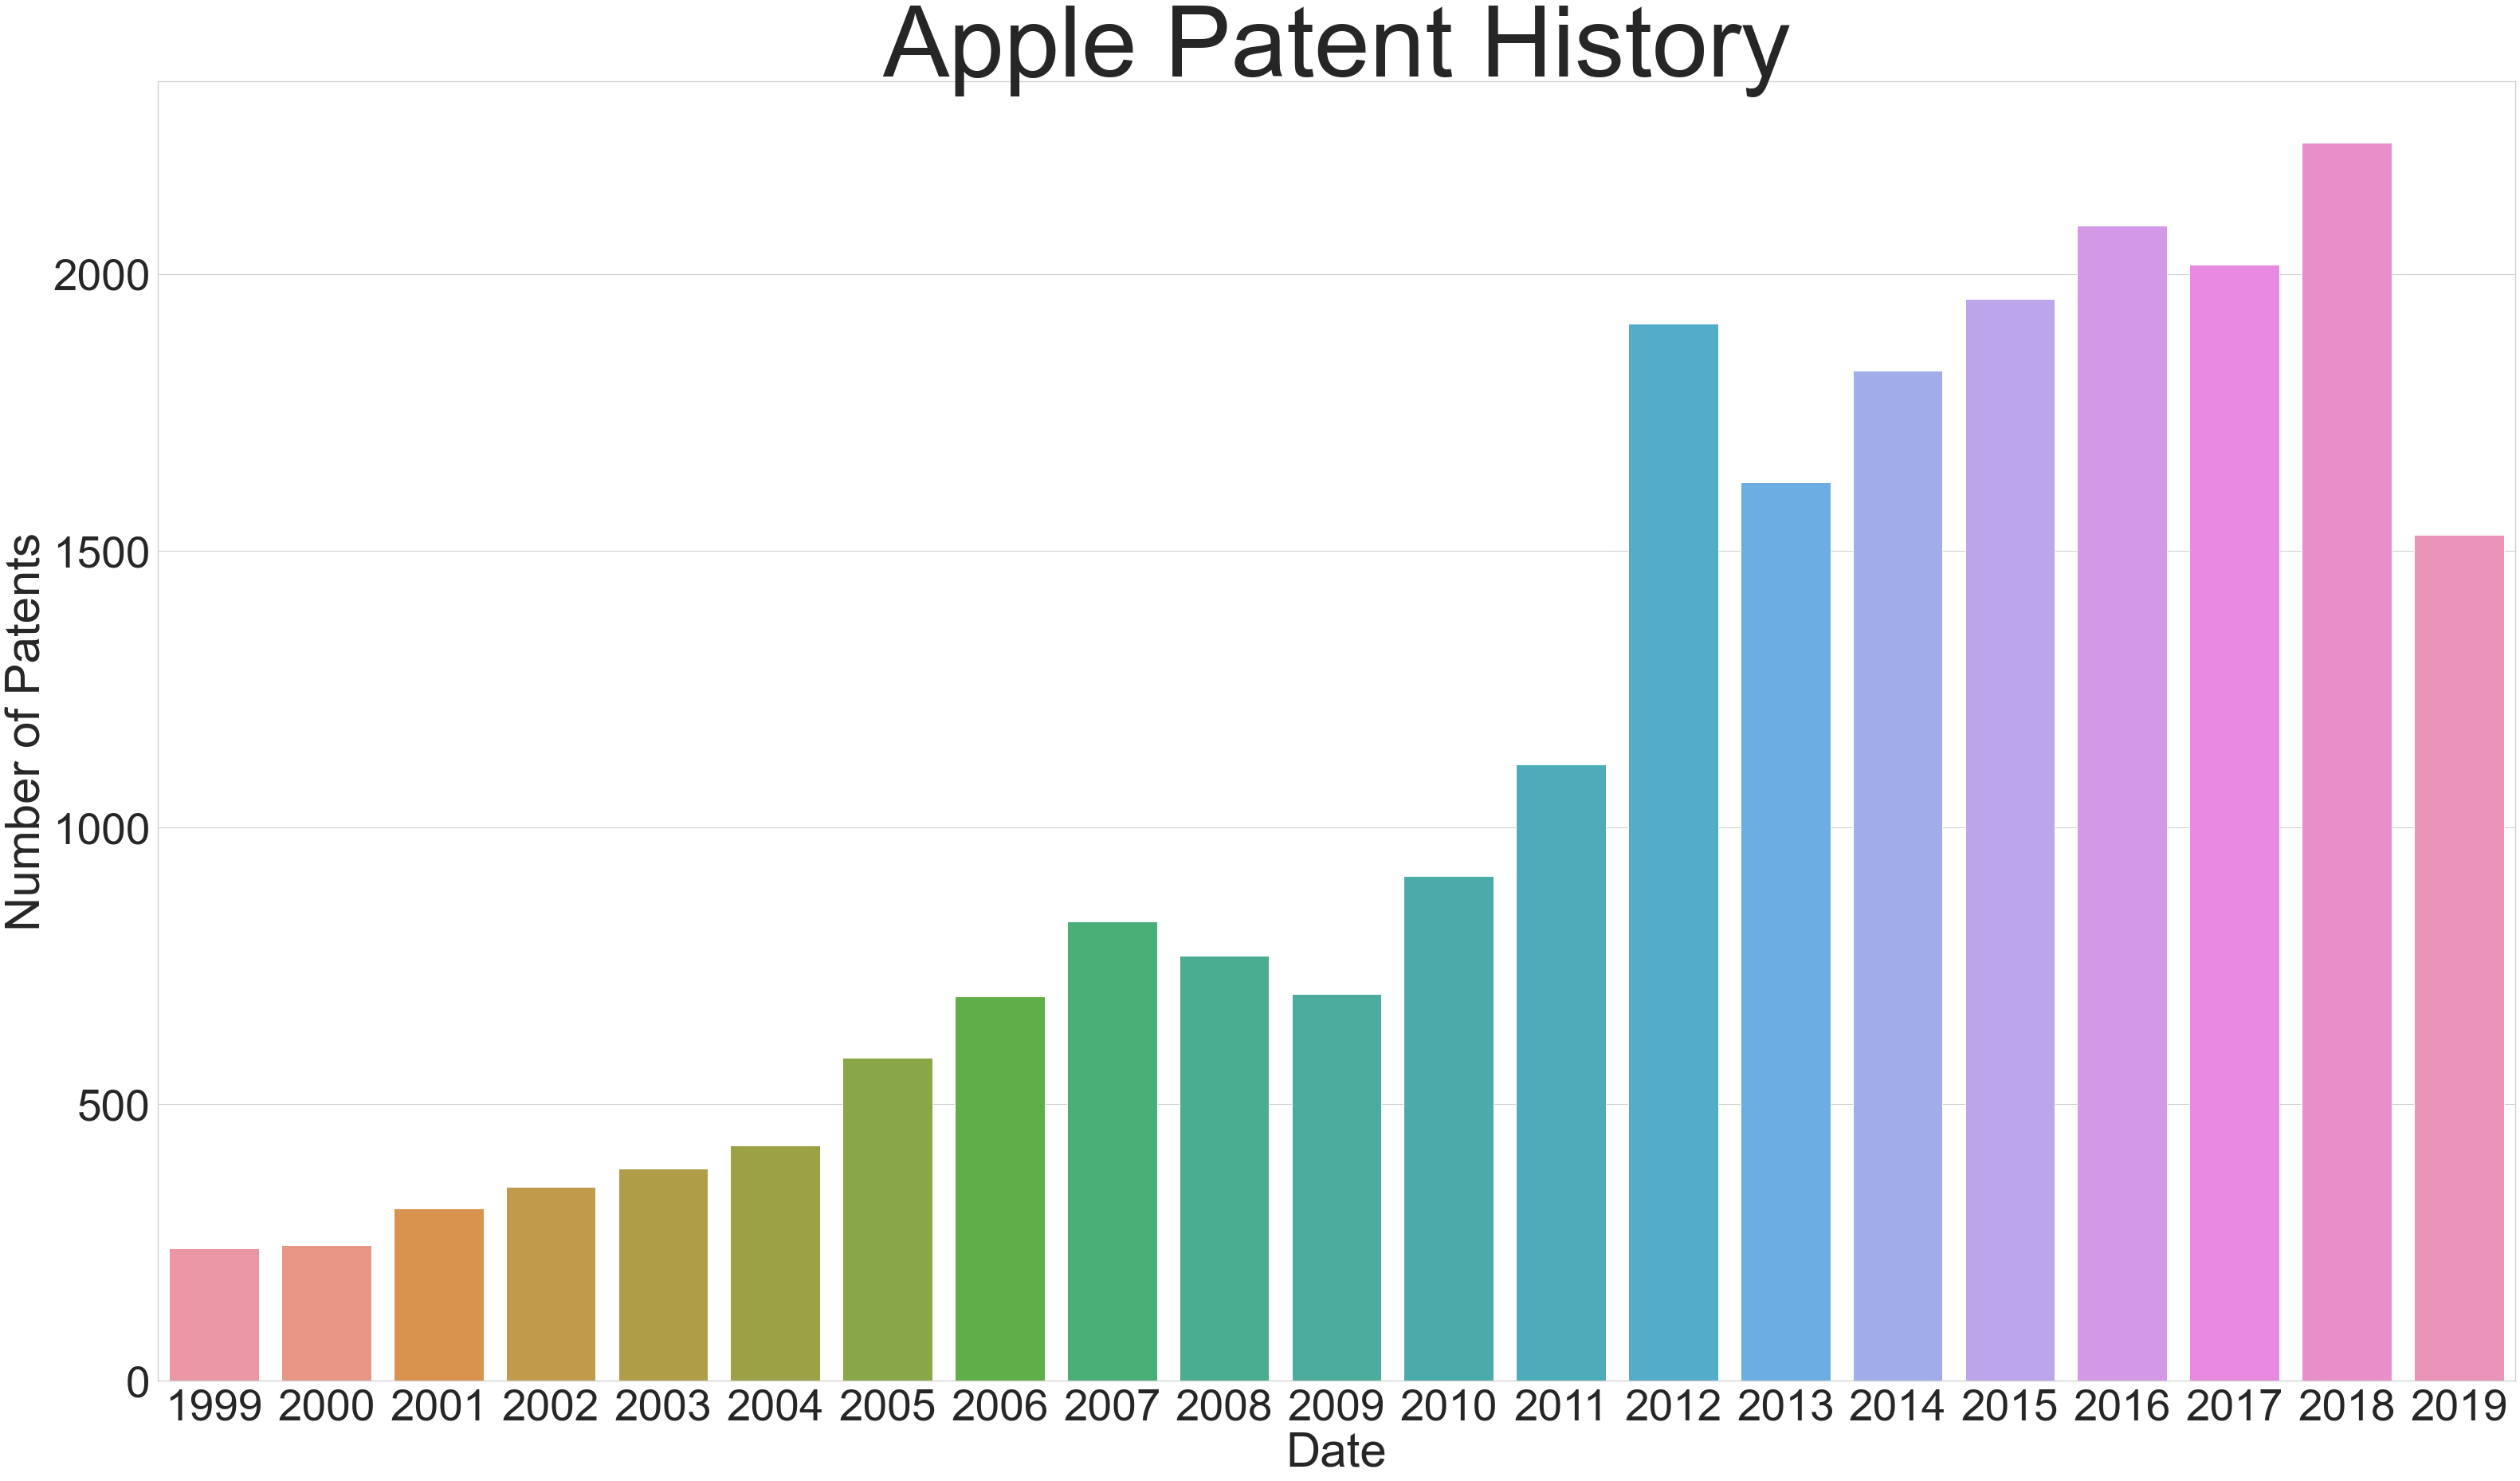

In [10]:
applepat_barplot=sns.barplot(x=countdf.index, y=countdf['Apple'], data=countdf).set_title('Apple Patent History', fontsize=125)
plt.ylabel('Number of Patents')
plt.show()
#applepat_barplot.figure.savefig(r'C:\Users\A\Jupyter\Patents & IP Project\Apple Patent History Barplot.png')

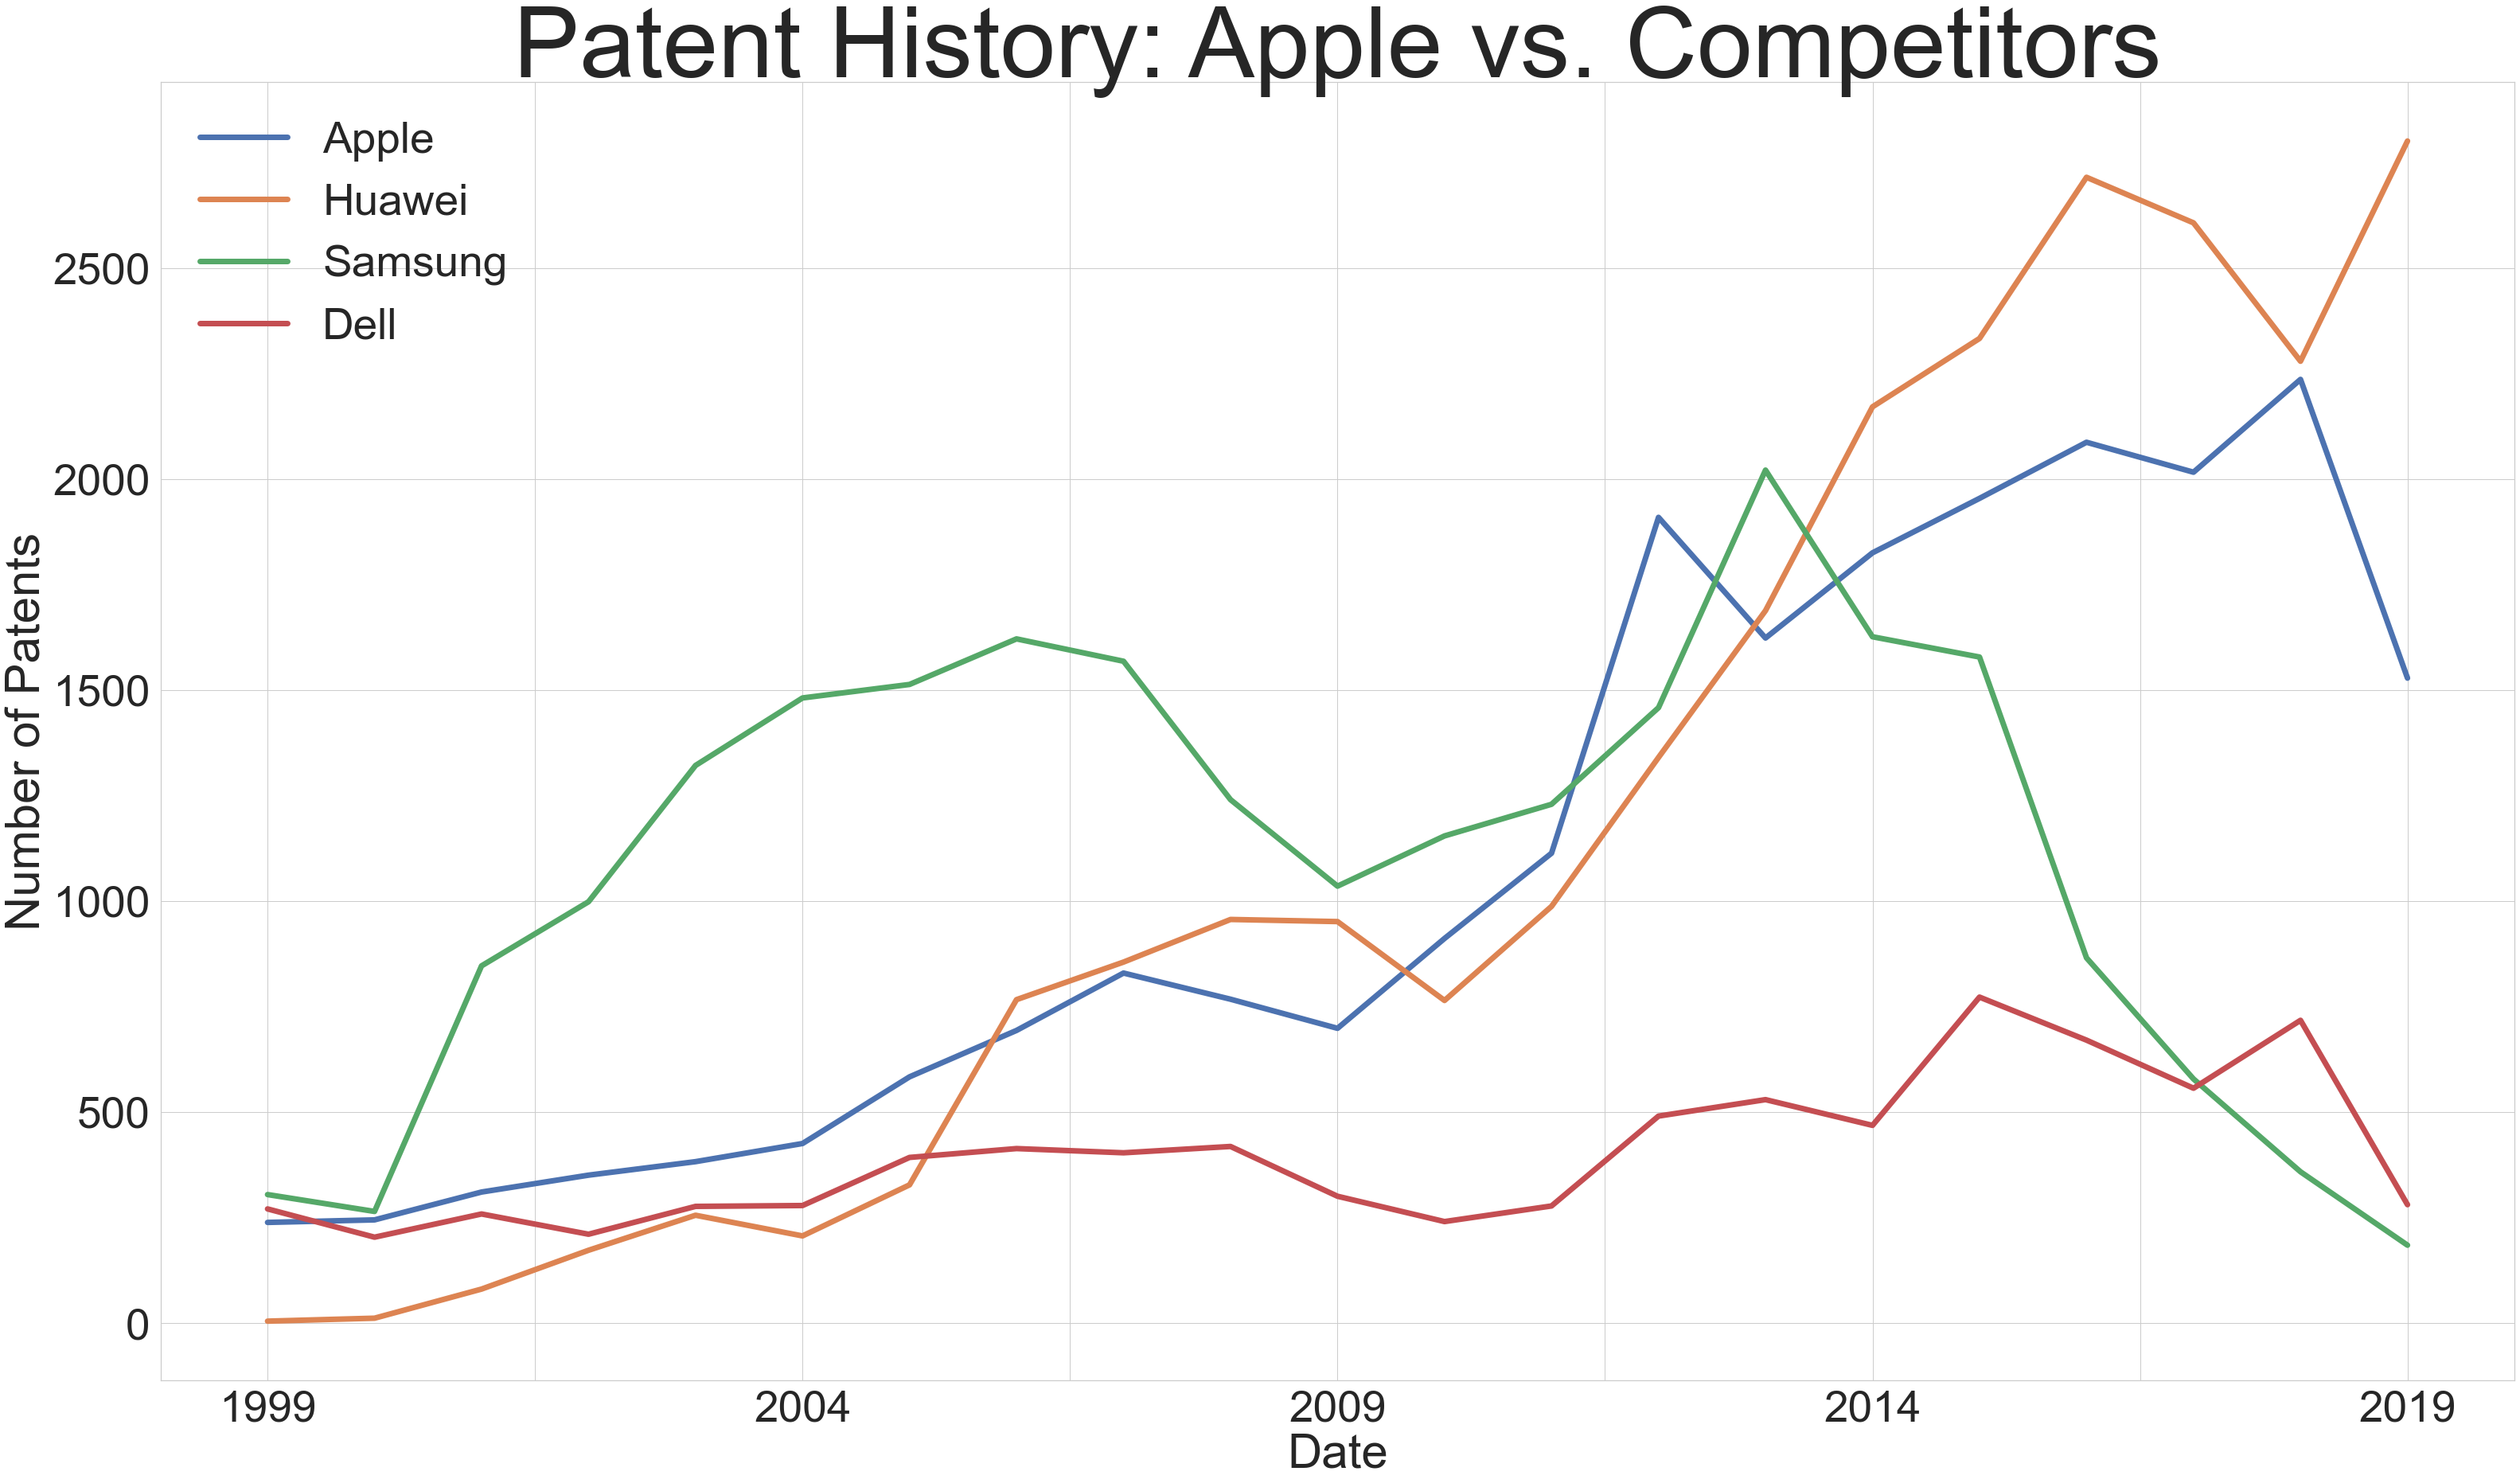

In [19]:
countplot=countdf.plot(linewidth=7).set_title('Patent History: Apple vs. Competitors', fontsize=125)
plt.ylabel('Number of Patents')
plt.style.use('seaborn')
plt.show()

In [20]:
ql_API_key=open(r'C:\Python\API Keys\QUANDL_API_KEY.txt')
CPI=ql.get("FRED/DDOE01USA086NWDB", apikey=ql_API_key)
CPI=CPI['1999':]

In [29]:
applerd=pd.read_csv(r'C:\Users\A\Jupyter\Patents & IP Project\Apple R&D Data.csv', index_col='Year')
applerd=applerd.drop(columns=['Unnamed: 3', 'R&D Expense (in Millions)', 'R&D as % of Total Revenue'])
applerd.index=applerd.index.map(str)
applerd=pd.concat([applerd, countdf['Apple']], axis=1)
applerd.index=pd.to_datetime(applerd.index, format='%Y')
applerd=applerd.rename(columns={'Apple': 'Number of Patents'})

Text(0.5, 1.0, 'Apple Patent and R&D Expense Correlation')

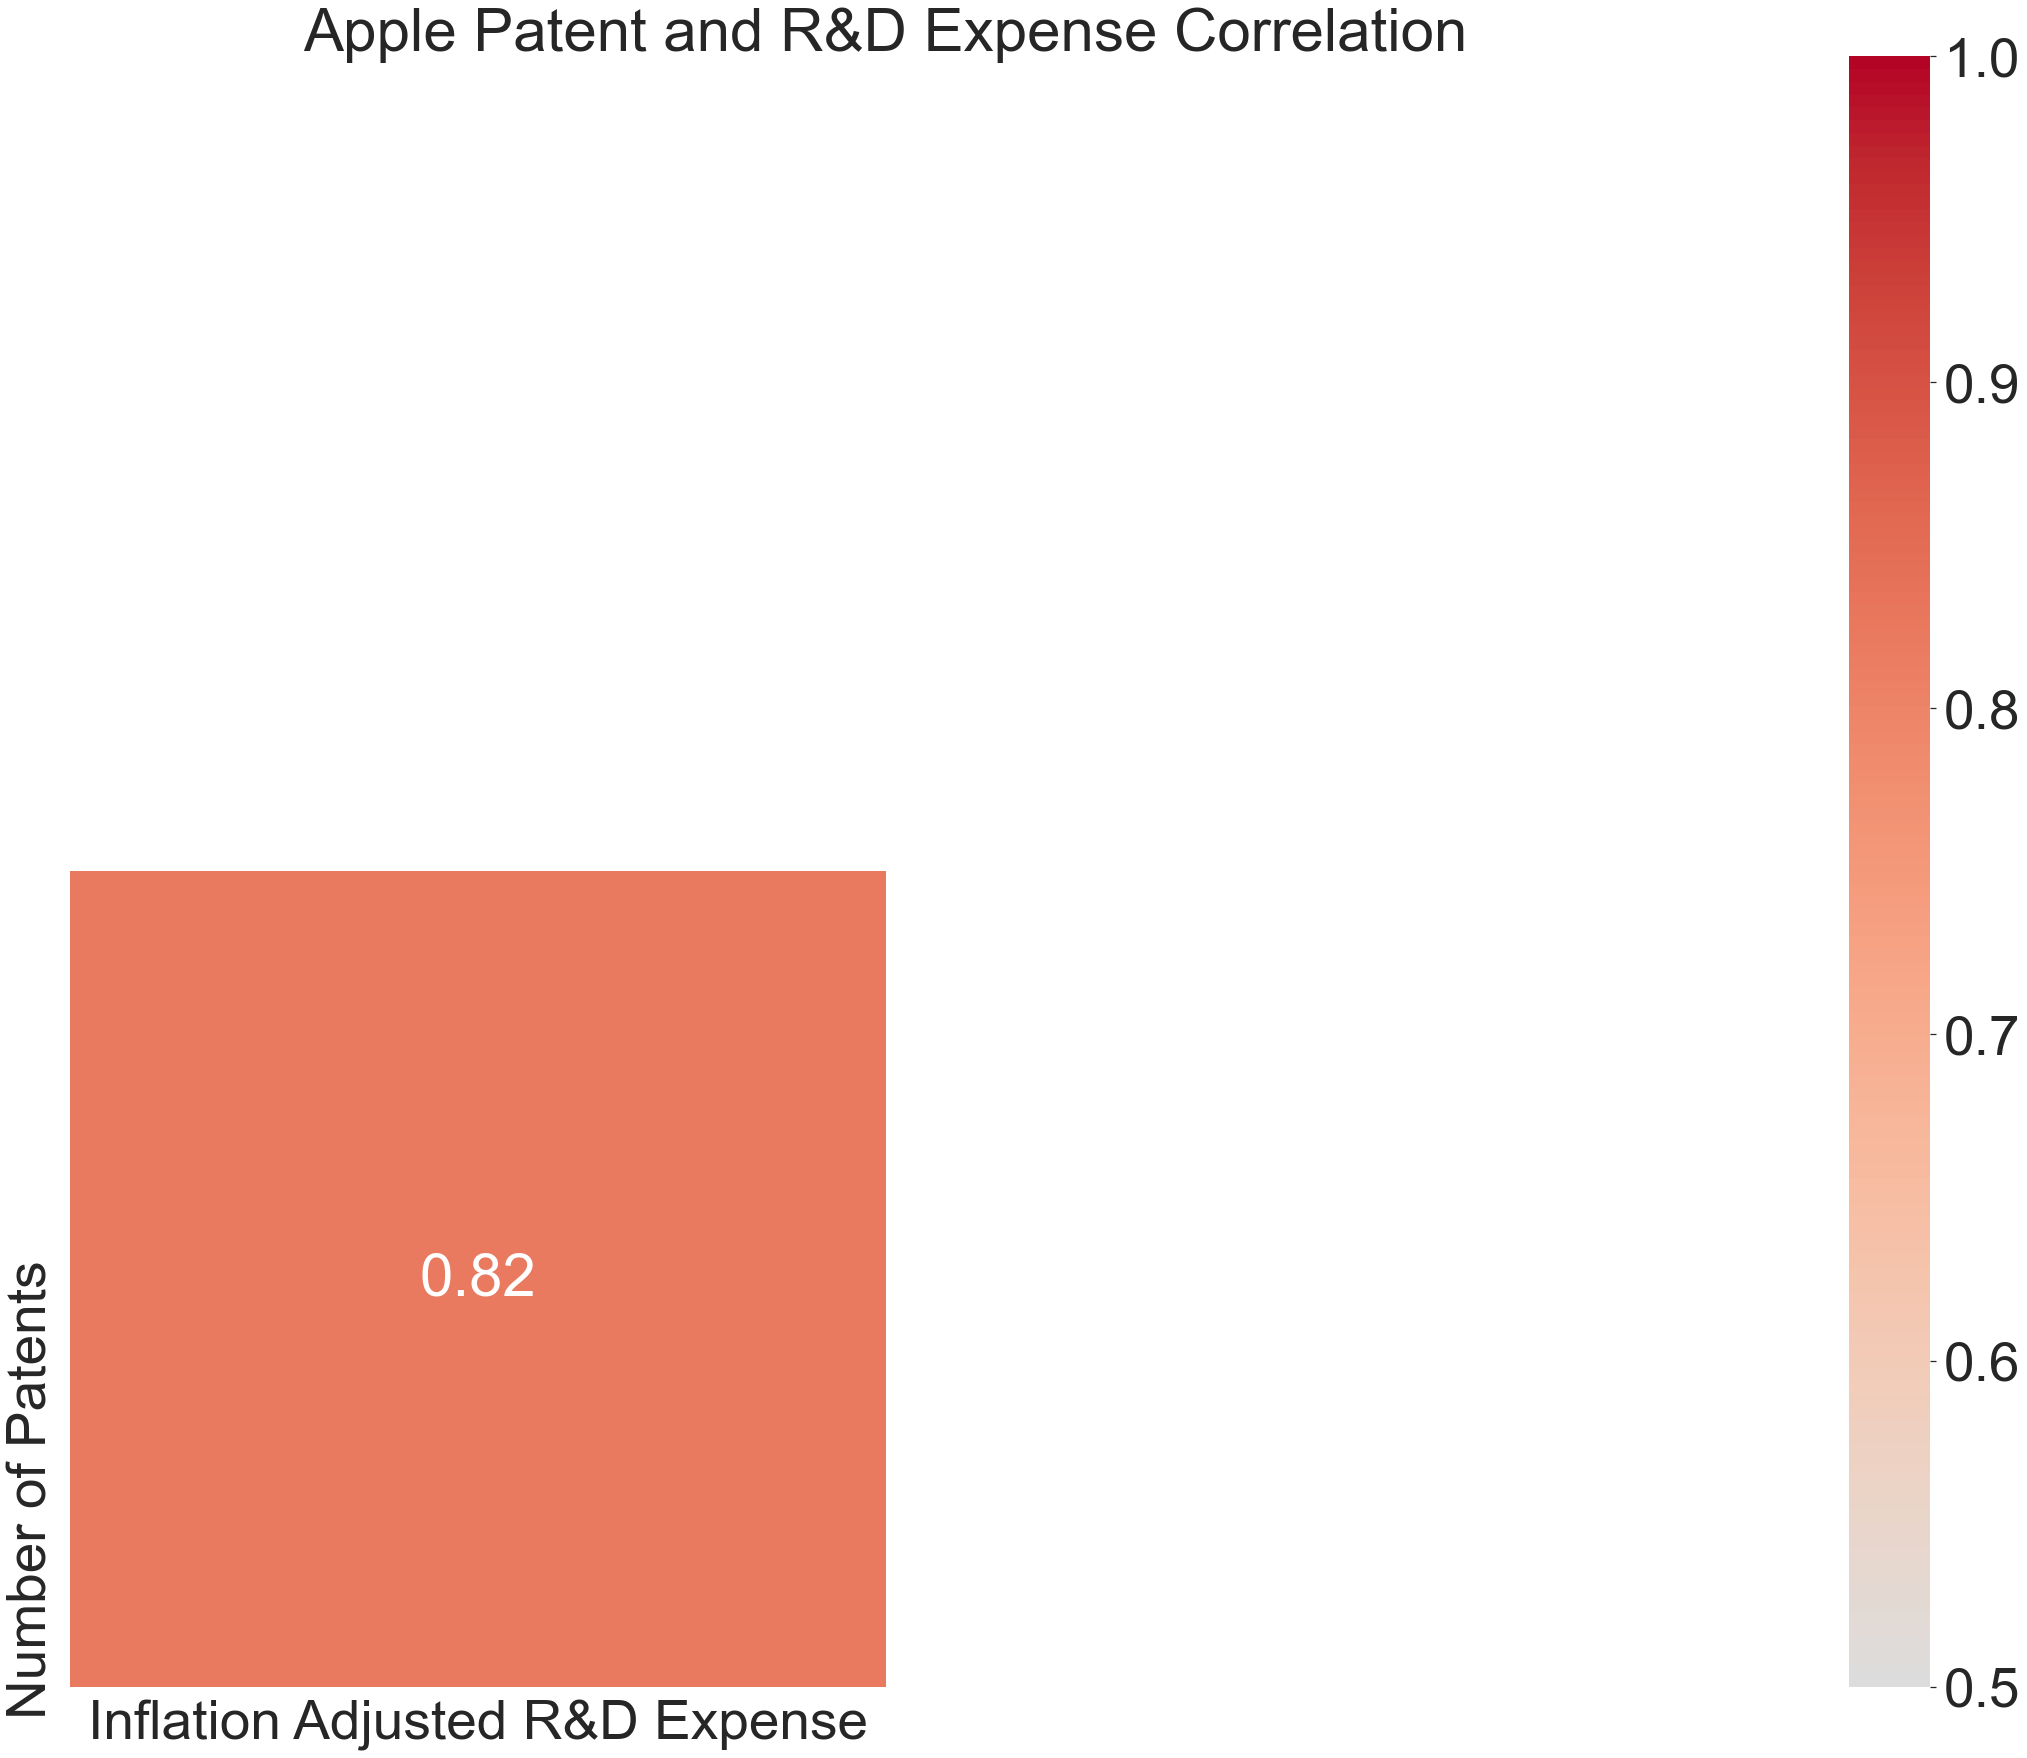

In [30]:
applecorr=np.triu(applerd.corr())
applecorr_heatmap=sns.heatmap(applerd.corr(), annot=True, vmin=.5, vmax=1, center= .5, cmap='coolwarm', square=True, mask=applecorr,yticklabels=['','Number of Patents'],xticklabels=['Inflation Adjusted R&D Expense',''])
applecorr_heatmap.set_title('Apple Patent and R&D Expense Correlation')

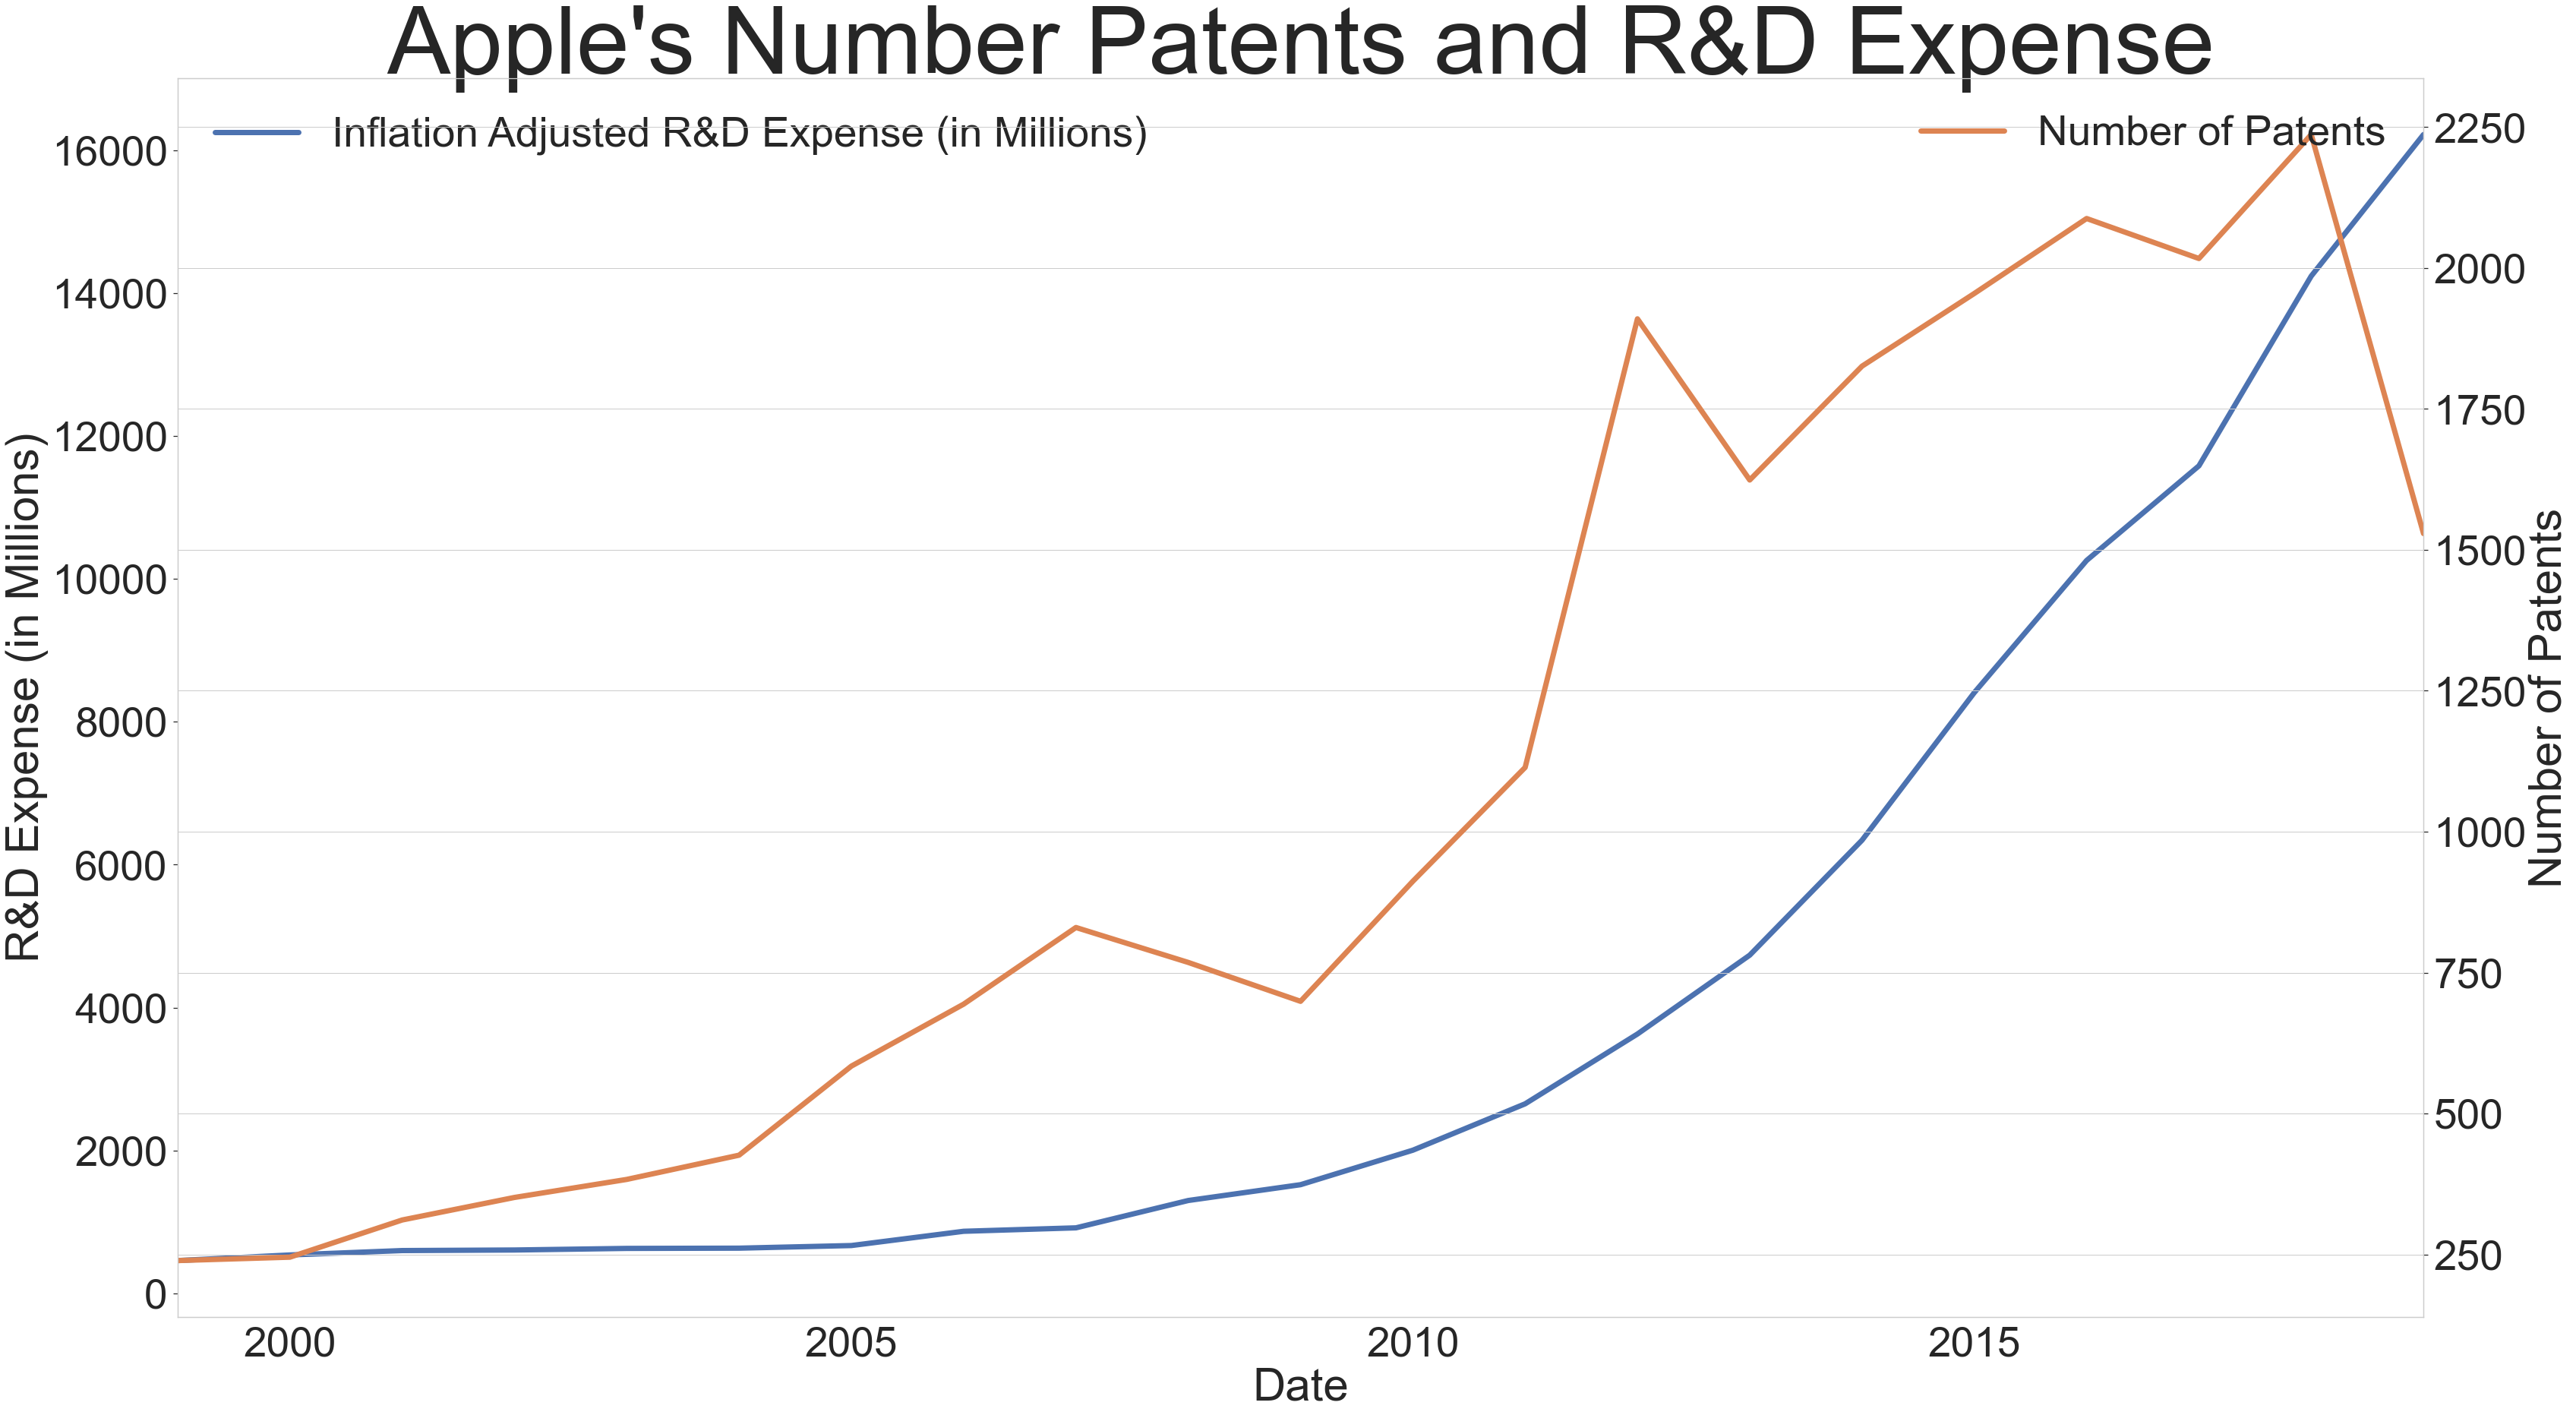

In [25]:
applerd['Inflation Adjusted R&D Expense (in Millions)'].plot(linewidth=7).set_title("Apple's Number Patents and R&D Expense", fontsize=125)
plt.legend()
plt.xlabel('Date')
plt.ylabel('R&D Expense (in Millions)')
applerd['Number of Patents'].plot(secondary_y=True, linewidth=7)
plt.ylabel('Number of Patents')
plt.legend(loc='upper right')

In [44]:
rdtr=pd.read_csv(r'C:\Users\A\Jupyter\Patents & IP Project\Apple R&D Data.csv', index_col='Year')
rdtr=rdtr.drop(columns=['Unnamed: 3', 'R&D Expense (in Millions)', 'Inflation Adjusted R&D Expense (in Millions)'])
rdtr.index=rdtr.index.map(str)
rdtr.index=pd.to_datetime(rdtr.index, format='%Y')
rdtr=rdtr.reset_index()
rdtr['Year']=rdtr['Year'].apply(lambda x: x.strftime('%Y'))
rdtr.set_index('Year', inplace=True)
rdtr.index=rdtr.index.rename('Date')

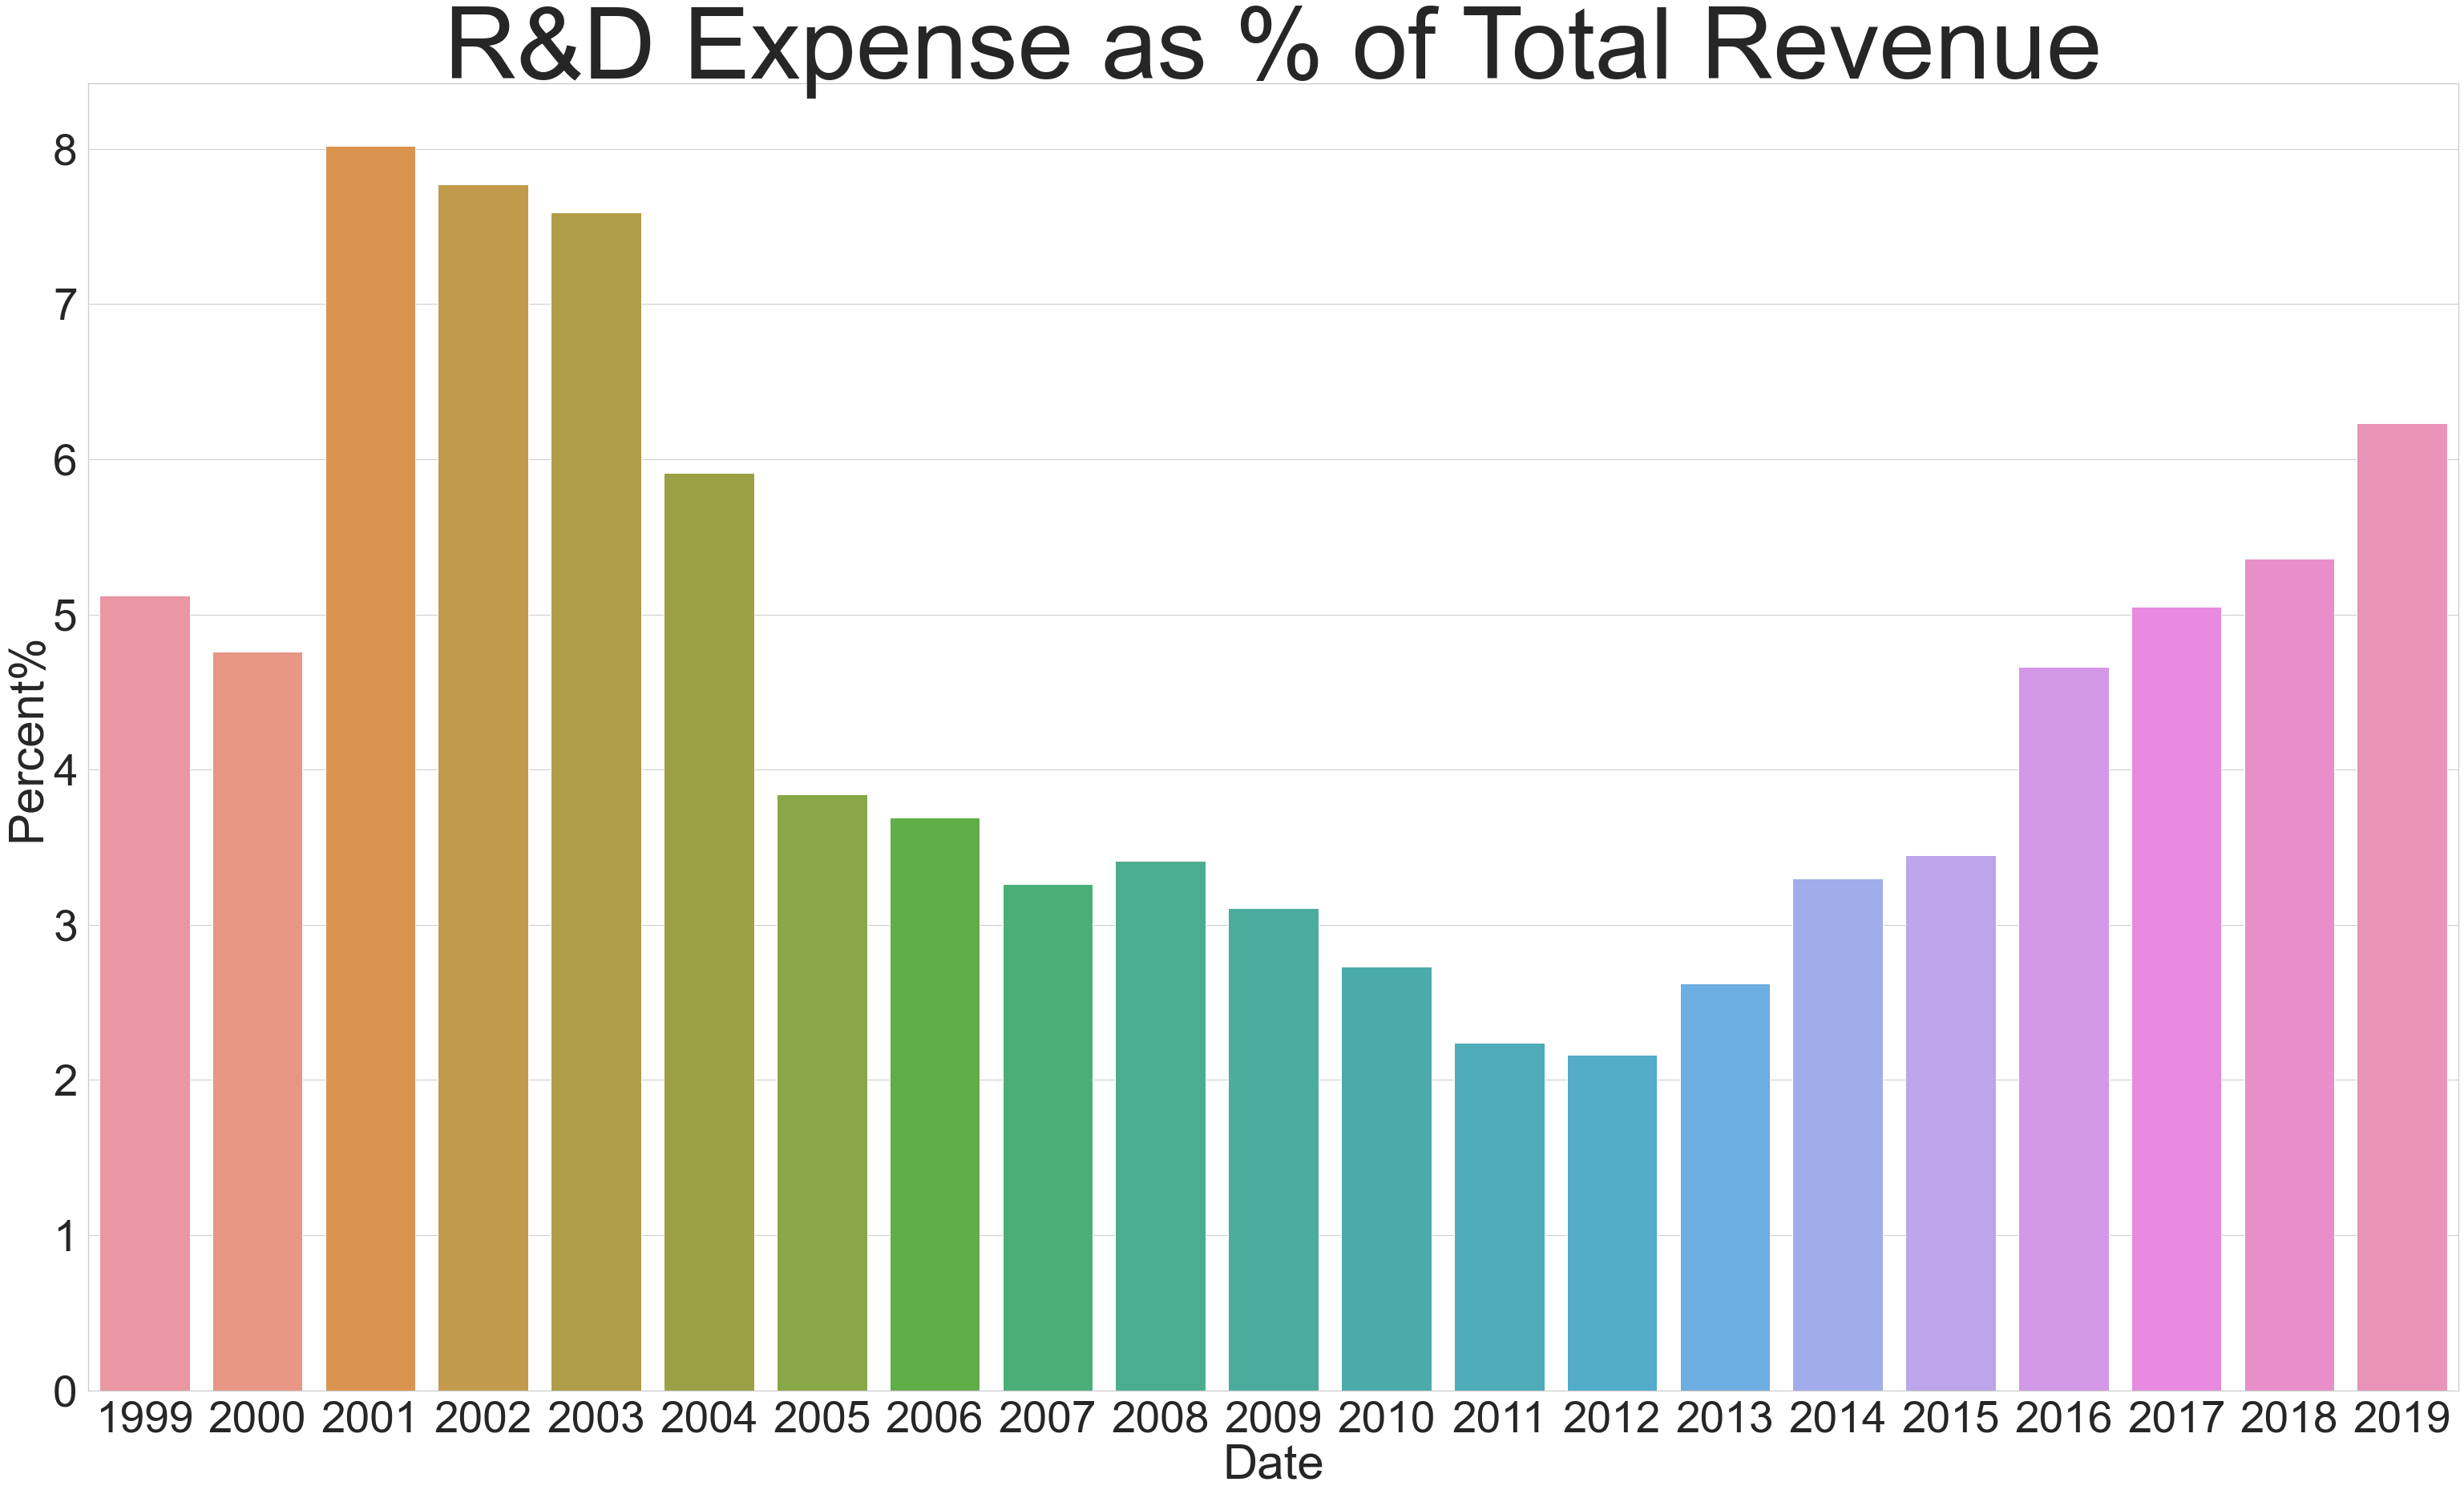

In [50]:
rdtrplot=sns.barplot(y=rdtr['R&D as % of Total Revenue'], x=rdtr.index, data=rdtr).set_title('R&D Expense as % of Total Revenue', fontsize=125)
plt.ylabel('Percent%')
rdtrplot.figure.savefig(r'C:\Users\A\Jupyter\Patents & IP Project\R&D Expense as Percentage of Total Revenue.png')
plt.show()

In [49]:
rdtr.mean()

R&D as % of Total Revenue    4.489524
dtype: float64